In [2]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
from IPython.display import display

In [29]:
f = open('elevator/scores.txt', 'r')
naive_scores = [-float(x.strip().split('\r\n')[0]) for x in f.readline().split(',')]
rl_scores = [-float(x.strip().split('\r\n')[0]) for x in f.readline().split(',')]
print naive_scores[:5]
print rl_scores[:5]
f.close()

[212.0, 214.0, 653.0, 306.0, 330.0]
[822.0, 33897.0, 7037.0, 2578.0, 5668.0]


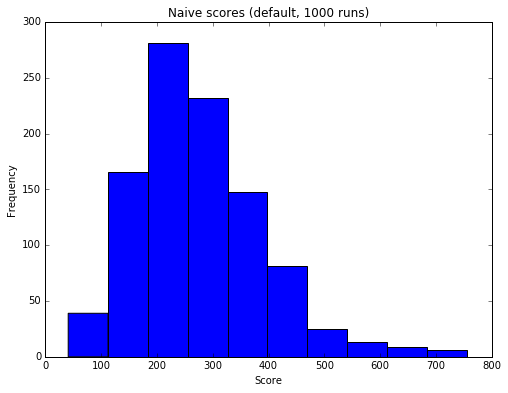

In [30]:
fig = plt.figure(figsize=(8, 6))
plt.hist(naive_scores)
plt.title('Naive scores (default, 1000 runs)')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

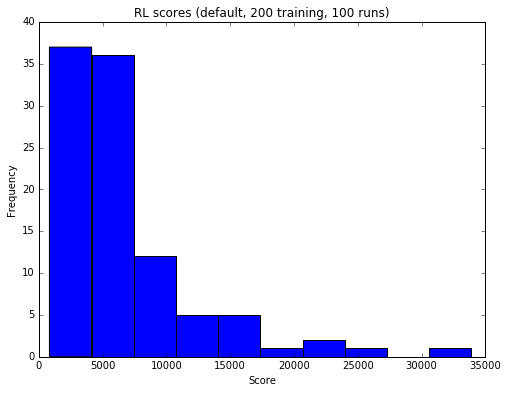

In [31]:
fig = plt.figure(figsize=(8, 6))
plt.hist(rl_scores)
plt.title('RL scores (default, 200 training, 100 runs)')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()